# **Task HD1** 
## Analyzing YouTube Video Data from News Publishers

##### This task focuses on analyzing YouTube videos about a news topic (e.g., Covid-19) published by at least 4 English news publishers (e.g., BBC, Fox News, ...) from a start date to an end date. You will need to specify the news topic and the list of keywords to search for the videos about that topic on YouTube. Also, you will need to extract the channel IDs of the news publishers using the function get_channel_info() given to you in the attached "collect.ipynb" file. All settings need to be specified in Section B (Settings) of "collect.ipynb" and also copied into Section B (Settings) of this jupyter notebook (HD1.ipynb). Please note the terms "News Publisher" and "Cahnnel" have been used interchangably in this task (each news publisher has a channel - if a news publisher has more than one channels on YouTube, pick any and state that in your TaskCompletionReport). The following instructions convey important information about the task. Please **read them carefully** and complete the task. If you need any clarification please    
<img src="youtube.png" alt="SIT112 Avocado!" width="1800" height="200">

### A. Instructions

#### Attachments
* directions.pdf
* collect.ipynb
* credentials-sample.ini
* video-presentation-guideline.pdf

#### Get Started 
0. Please watch [this video](https://www.youtube.com/watch?v=N9CT6Ggh0oE) about Sentiment Analysis.
1. Rename the "credentials-sample.ini" file to "credentials.ini" and follow the instructions. 
2. Creat your YouTube API key and assign it to developer_key in the credentials.ini file. You will need the YouTube API key to get access to the YouTube API (collect the data). See the following video: https://youtu.be/N18czV5tj5o (the video is not up to date; the instrucitons might be sighly different. You can view the following link for more details: https://developers.google.com/youtube/v3/getting-started). Please note Projects that enable the YouTube Data API have a default quota allocation of 10,000 units per day; to make an efficient use of your quota, please avoid multiple excecutions of the "collect.ipynb" file: https://developers.google.com/youtube/v3/guides/quota_and_compliance_audits. 
3. To work with the YouTube API (send queries), you need to install Google API Python Client using: "conda install google-api-python-client" 
#### Specify the news topic and news publishers (channels)
4. Choose a news topic (e.g., Covid-19) and a list of keywords to be used for finding videos about that topic. You can extract the keywords by looking at some sample video titles. 
5. Choose at least 4 popular English news publishers (e.g., BBC, Fox News).
6. Extract, manually, the video IDs of sample videos from different news publishers (channels). You can do so by clicking on the share button for each video. 
7. Extract the Channel IDs of the videos using the get_channel_info() function in collect.ipynb 
#### Collect the Videos and Comments using "collect.ipynb" 
8. Specify the Channel IDs and names in the Settings section of the attached collect.ipynb file (CHANNELS = {...})
9. Specify the list keywords in the Settings section of the attached collect.ipynb file (KEYWORDS = [...])
10. Specify the START_DATE and END_DATE in the Settings section of the attached collect.ipynb file
11. Specify the MAX_VIDEOS such that you can extract **at least 20 videos per news publisher (channel)**. Make sure for your specified topic, **at least 300 comments per news publisher (channel)** can be collected. Please note some publishers might have disabled comments.
12. Please **do not make any changes to the "collect.ipynb" file**
13. Execute the collect.ipynb file to collect the videos (will be stored in videos.csv) and the comments on those videos (will be stored in comments.csv).
#### Complete the Task
14. <font color='red'> Choose only 1 question from Section E</font>, and answer it based on the hints. Please note, for each question, you must **briefly discuss your observations** based on the results.
15. Please note **there is no unique solution** for most questions; if you need to make any assumptions, **state your assumptions** in the comments and in your TaskCompletionReport and answer the question accordingly. Please also note, **if something has not been clearly stated in a question (e.g., the type of visualization, etc) it means you are allowed to make your own choice**. 
16. **Read the attached "video-presentation-guideline.pdf"** carefully and record a video clip (based on video-presentation-guideline.pdf) that presents your completed task. Upload the video on a video repository such as YouTube (or any other preferred repository) and provide the link in the TaskCompletionReport. 
17. Complete the TaskCompletionReport form.

#### Submit the Task
18. Please make sure you have copied the settings from collect.ipynb into your solution file (HD1.ipynb), under section B (settings).  
19. Please make sure you have executed and saved all the cells in your jupyter notebook without any error; otherwise, your submission may not be flagged as complete. 
20. Please make sure you have included the link to the video rcording of your presentation in your TaskCompletionReport. 
21. Submit (1) the TaskCompletionReport as a "PDF" file and (2) your solution file (HD1.ipynb) as an "ipynb" file (do not zip/combine them). Please do not include "collect.ipynb" in your submission. 

#### <font color ='red'>Attend the Interview </font>
22. Please attend your interview - on week 11 - during the workshop you are enrolled in. 
23. Please make sure you have submitted your task via OnTrack before the interview; you can still resubmit by the end of Week 12 if any changes are needed. 
24. During the interview, you will be asked questions about your submission and might be directed to make changes to your code and explain their impacts on the results/observations. 

Good luck :)

### B. Settings
Copy your settings from Section B of the "collect.ipynb" file below (as Python comments).

In [8]:
VIDEOS_FILE = "videos.csv"
COMMENTS_FILE = "comments.csv"
CREDENTIALS_FILE = 'credentials.ini'
START_DATE = datetime(2020, 1, 1)
END_DATE = datetime(2023, 1, 1)
KEYWORDS =['coronavirus', 'covid', 'covid-19', 'pandemic']
# You can use functin get_channel_info() to extract the channel ID of a sample video from a news publisher ...
CHANNELS = {
    'UCXIJgqnII2ZOINSWNOGFThA' : 'Fox News',
    'UC16niRr50-MSBwiO3YDb3RA' : 'BBC News',
    'UCupvZG-5ko_eiXAupbDfxWw' : 'CNN',
    'UCaXkIU1QidjPwiAYu6GcHjg' : 'MSNBC'
}
MAX_VIDEOS = 50 # the maximum number of video that should be returned for each request. Acceptable values are 0 to 50
QUERY= f"intitle:{','.join(KEYWORDS)}"

In [9]:
# Install required packages
!pip install pandas seaborn matplotlib google-api-python-client nltk wordcloud langdetect textblob prettytable tabulate


### C. Imports
You need to import the following libraries. Install the libraries using "conda install ... or pip install ..." if they have not been installed on your machine. For example you can install google api python client by executing "conda install google-api-python-client"

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from datetime import datetime
import os
from configparser import ConfigParser
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from langdetect import detect
import langdetect
from textblob import TextBlob
import calendar
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from prettytable import PrettyTable
from tabulate import tabulate
import numpy as np
from collections import defaultdict
import warnings
# from pandas.core.common import SettingWithCopyWarning
from nltk.stem import WordNetLemmatizer
# Ignore the warning
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sakshambehal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### D. Clean and Prepare the Data

##### D.1. Write Python code that cleans the data for analyzing the videos and comments.

In [3]:
# a basic data cleaning has been performed on the collected data by the clean_data()function in collect.ipynb
# additionl data cleaning can be added here - if needed  

##### D.2. Write Python code that prepares the data for analyzing the videos and comments.

In [42]:
# A sample code for data preparation has been given below. Feel free to edit when needed

# Load the videos and comments dataframes from their respective CSV files
videos_df = pd.read_csv('videos.csv')
comments_df = pd.read_csv('comments.csv')

# Convert the published_at column to a datetime object for videos_df
videos_df['published_at'] = pd.to_datetime(videos_df['published_at'], format='%Y-%m-%dT%H:%M:%SZ')

# Create a new column that contains the published_at weekly
videos_df['published_at_week'] = videos_df['published_at'].dt.strftime('%Y-%m-%W')

# Create a new column that contains the published_at monthly
videos_df['published_at_month'] = videos_df['published_at'].dt.strftime('%Y-%m')

# Create a new column that contains the published_at monthly
videos_df['published_at_year'] = videos_df['published_at'].dt.strftime('%Y')

# Convert the published_at column to a datetime object for comments_df
comments_df['comment_date'] = pd.to_datetime(comments_df['comment_date'], format='%Y-%m-%dT%H:%M:%SZ')

# Create a new column that contains the published_at weekly
comments_df['comment_date_week'] = comments_df['comment_date'].dt.strftime('%Y-%m-%W')

# Create a new column that contains the published_at monthly
comments_df['comment_date_month'] = comments_df['comment_date'].dt.strftime('%Y-%m')

# Create a new column that contains the published_at monthly
comments_df['comment_date_year'] = comments_df['comment_date'].dt.strftime('%Y')

# Convert the duration column to seconds for videos_df
videos_df['duration'] = videos_df['duration'].apply(lambda x: re.findall(r'PT(\d+)M(\d+)S', x))
videos_df['duration'] = videos_df['duration'].apply(lambda x: int(x[0][0]) * 60 + int(x[0][1]) if len(x) > 0 else 0)

# Prepared DataFrame objects; can be used for data analysis
videos = videos_df
comments = comments_df
videos_comments = pd.merge(videos,comments, on='video_id', how = 'inner') # merged videos and comments

##### D.3. Write Python code that takes a text input and returns its sentiment (polarity) score and sentiment category (positive, negative, neutral)

In [32]:
# This function takes a text input and returns its sentiment (polarity) score
# If the text is null, it returns 0
def get_sentiment_score(text):
    if pd.isnull(text):
        return 0
    else:
        analysis = TextBlob(str(text))
        return analysis.sentiment.polarity
    
# This function takes a text input and returns its sentiment category
# If the text is null, it returns 'neutral'
# If the polarity score is greater than 0, it returns 'positive'
# If the polarity score is less than 0, it returns 'negative'
# Otherwise, it returns 'neutral'
def get_sentiment(text):
    if pd.isnull(text):
        return 'neutral'
    else:
        blob = TextBlob(str(text))
        if blob.sentiment.polarity > 0:
            return 'positive'
        elif blob.sentiment.polarity < 0:
            return 'negative'
        else:
            return 'neutral'

In [12]:
display(comments_df.columns)
display(videos_df.columns)
display(comments_df.head())
display(videos_df.head())

Index(['video_id', 'comment_id', 'comment_text', 'comment_author',
       'comment_date', 'comment_like_count', 'parent_comment_id',
       'comment_date_week', 'comment_date_month', 'comment_date_year'],
      dtype='object')

Index(['video_id', 'channel_id', 'video_title', 'channel_title',
       'category_name', 'live_upcoming_none', 'view_count', 'like_count',
       'dislike_count', 'comment_count', 'published_at', 'tags', 'duration',
       'definition', 'caption', 'thumbnail', 'url', 'published_at_week',
       'published_at_month', 'published_at_year'],
      dtype='object')

,video_id,comment_id,comment_text,comment_author,comment_date,comment_like_count,parent_comment_id,comment_date_week,comment_date_month,comment_date_year
0,d1eEWihvwpQ,UgxmZNK1ZIj5jMBUemZ4AaABAg,permanently messed sense time,@radioactivebeverage,2024-03-15 01:47:38,2.0,NaN,2024-03-11,2024-03,2024
1,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg,covid august super unpleasant got vaccines boo...,@rosieasmrwhispererzephier7021,2022-10-11 02:46:38,0.0,NaN,2022-10-41,2022-10,2022
2,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg.9h1A5EF38D69wxn0x1JQlS,showlinemuch better also influenza december la...,@rosieasmrwhispererzephier7021,2023-11-11 02:21:41,0.0,UgxbTG_0cWGvMAee0sx4AaABAg,2023-11-45,2023-11,2023
3,d1eEWihvwpQ,UgzBGHRwVHq4rkAa4AZ4AaABAg,happened march videos made,@danhobson24,2022-06-08 21:53:44,0.0,NaN,2022-06-23,2022-06,2022
4,d1eEWihvwpQ,Ugy03Fu2_XAUTUUsHtB4AaABAg,year,@monsehere8090,2021-03-14 15:29:55,2.0,NaN,2021-03-10,2021-03,2021


,video_id,channel_id,video_title,channel_title,category_name,live_upcoming_none,view_count,like_count,dislike_count,comment_count,published_at,tags,duration,definition,caption,thumbnail,url,published_at_week,published_at_month,published_at_year
0,d1eEWihvwpQ,UCXIJgqnII2ZOINSWNOGFThA,who declares coronavirus outbreak a pandemic,Fox News,News & Politics,none,457067,3624,0,1939,2020-03-11 16:50:56,"fox news alert,breaking news,fox,news,fox news...",0,hd,True,https://i.ytimg.com/vi/d1eEWihvwpQ/default.jpg,https://www.youtube.com/watch?v=d1eEWihvwpQ,2020-03-10,2020-03,2020
1,2j3YtPVBT30,UCXIJgqnII2ZOINSWNOGFThA,ny gov cuomo talks rent payments coronavirus c...,Fox News,News & Politics,none,84916,539,0,543,2020-03-30 18:00:34,"Fox News Channel,FNC,Fox News,News,Latest News...",2274,hd,False,https://i.ytimg.com/vi/2j3YtPVBT30/default.jpg,https://www.youtube.com/watch?v=2j3YtPVBT30,2020-03-13,2020-03,2020
2,lydWQoqDNp8,UCXIJgqnII2ZOINSWNOGFThA,tucker coronavirus pandemic is a real fear,Fox News,News & Politics,none,459507,9068,0,2273,2020-02-25 02:20:00,"health,coronavirus,china,wuhan china,novel cor...",168,hd,True,https://i.ytimg.com/vi/lydWQoqDNp8/default.jpg,https://www.youtube.com/watch?v=lydWQoqDNp8,2020-02-08,2020-02,2020
3,jXHikITwlng,UCXIJgqnII2ZOINSWNOGFThA,bill gates on his virus warning efforts to fi...,Fox News,News & Politics,none,887804,8210,0,12368,2020-04-05 18:50:02,"Fox News Channel,Fox News,News,fox news sunday...",749,hd,True,https://i.ytimg.com/vi/jXHikITwlng/default.jpg,https://www.youtube.com/watch?v=jXHikITwlng,2020-04-13,2020-04,2020
4,ACLU0OxWisE,UCXIJgqnII2ZOINSWNOGFThA,ingraham coronavirus pandemic spreads through us,Fox News,News & Politics,none,381529,6990,0,2883,2020-03-13 04:00:05,"Coronavirus,covid-19,coronavirus outbreak,coro...",352,hd,True,https://i.ytimg.com/vi/ACLU0OxWisE/default.jpg,https://www.youtube.com/watch?v=ACLU0OxWisE,2020-03-10,2020-03,2020


### E. Analyze the Videos and Comments
* Please make sure you have watched [this video](https://www.youtube.com/watch?v=N9CT6Ggh0oE) and understood the concept of Sentiment Analysis.
* Choose <font color ='red'>(only) 1 </font> of the following questions and write Python code to answer it. 
* Please note you must (briefly) discuss your observations. 
* Use function get_sentiment_score() to identify the sentiment (polarity) score of the video titles or comments.
* Use function get_sentiment() to identify the sentiment categories (positive, negative, neutral) of the video titles or comments.
* Please note the comments are provided to partially guide you; you are not required to strictly follow them. 


##### E.1. What is the monthly distribution of the positive, negative, and neutral sentiments in the video titles and comments from Jan 2020 to Jan 2021? Use visualization to answer this question for different news publishers (channels) and discuss your observations. 

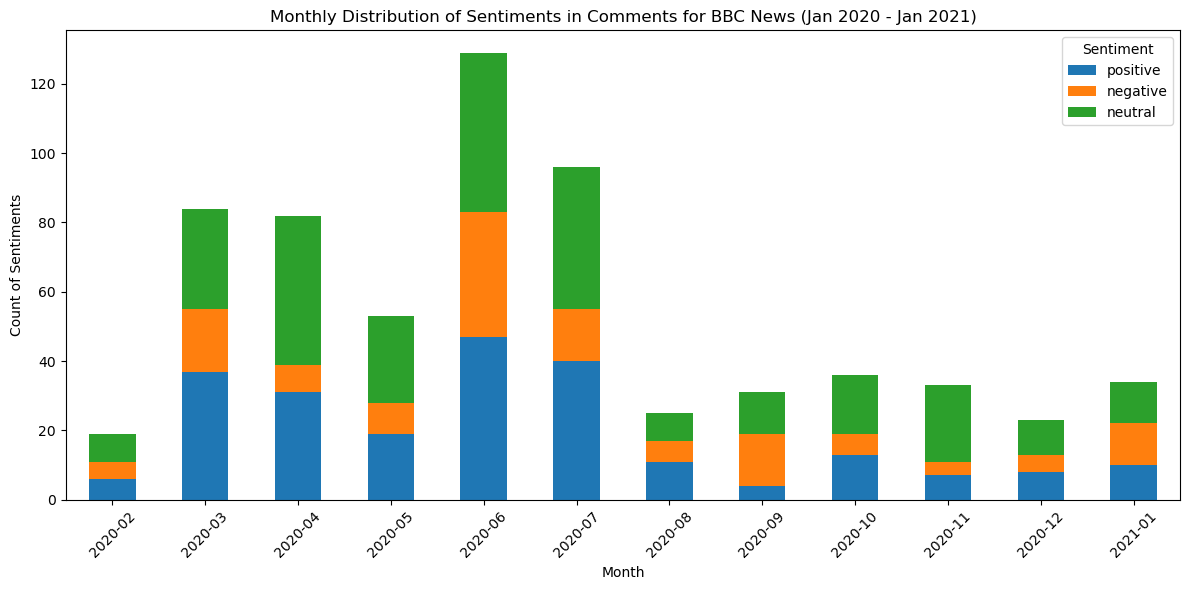

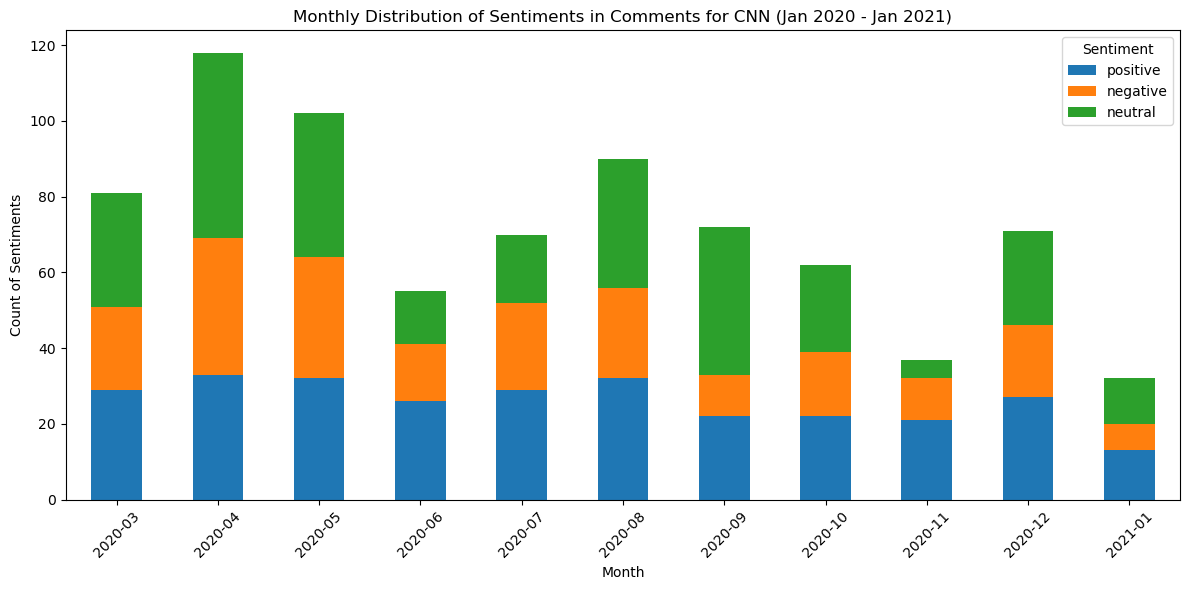

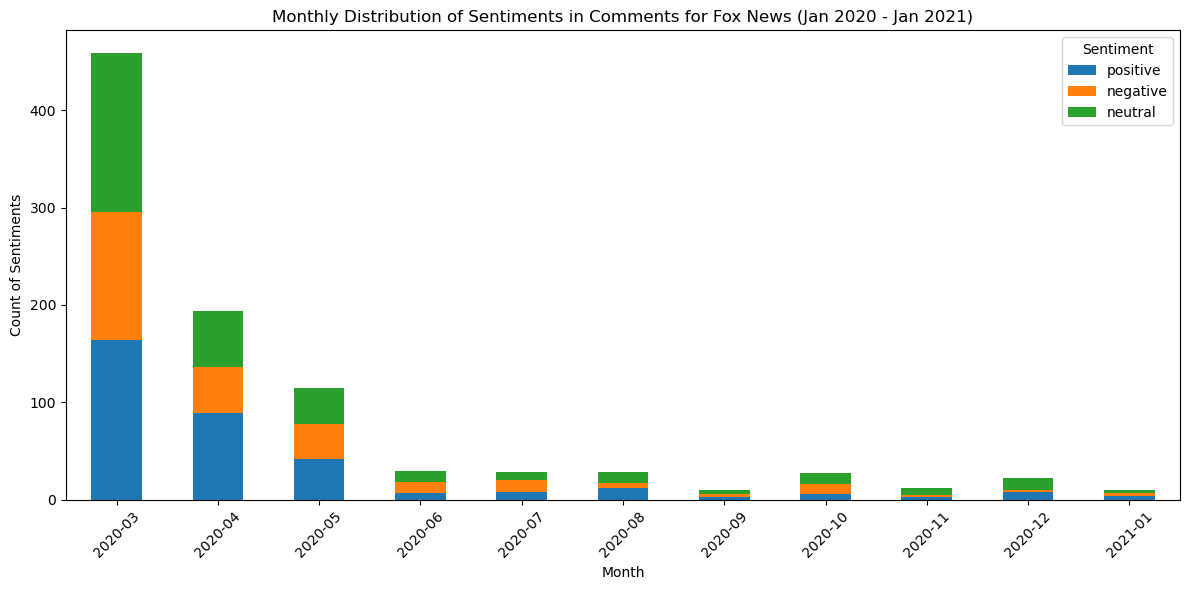

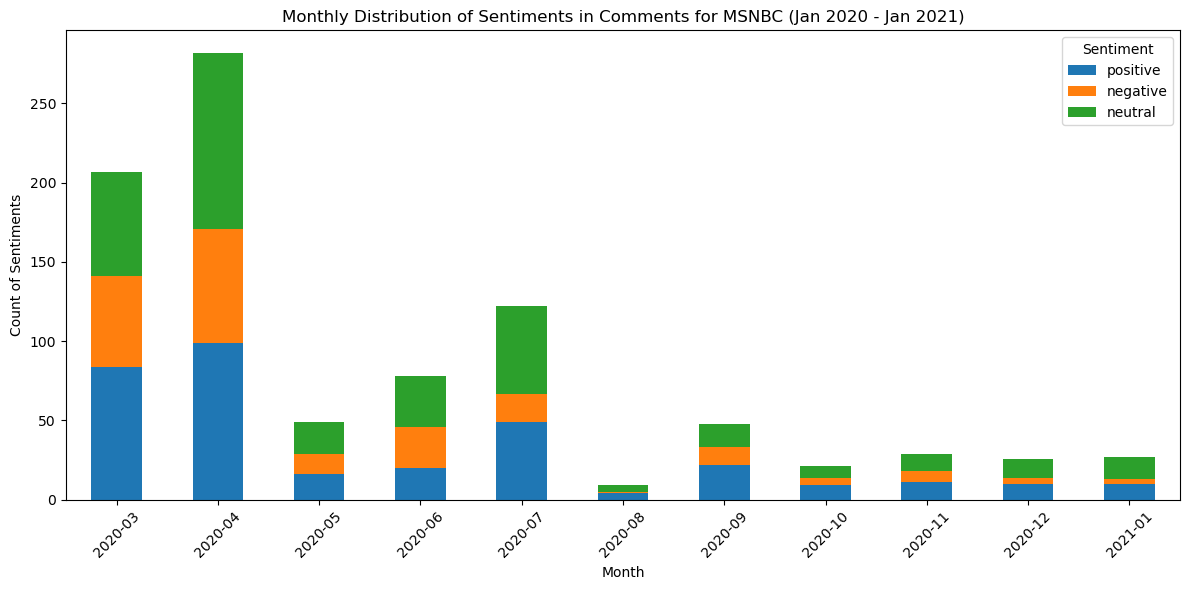

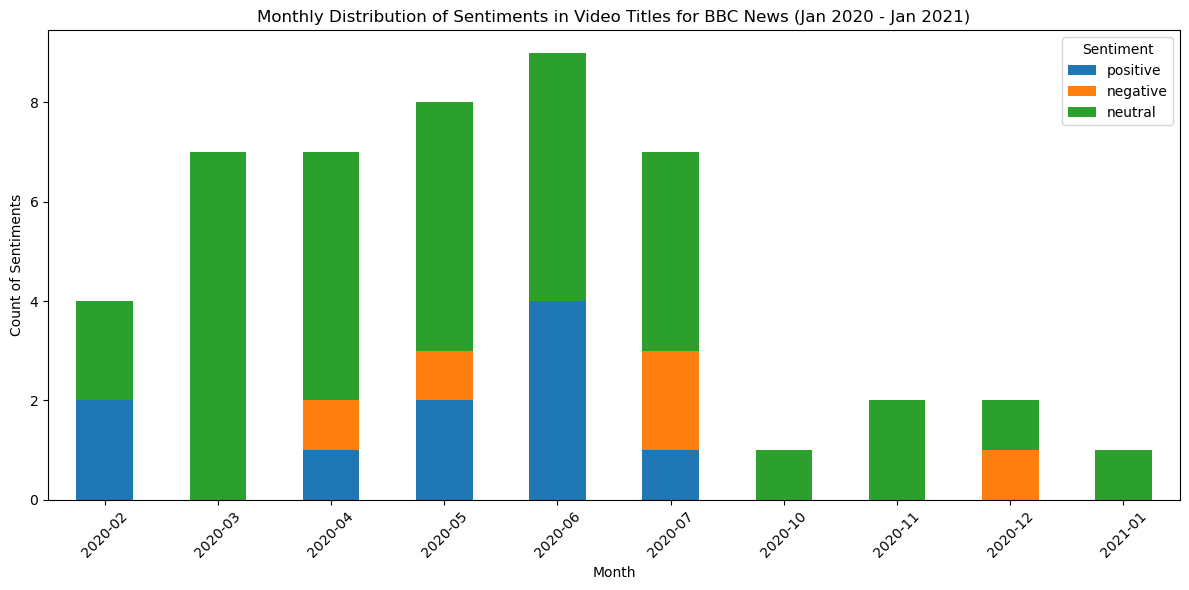

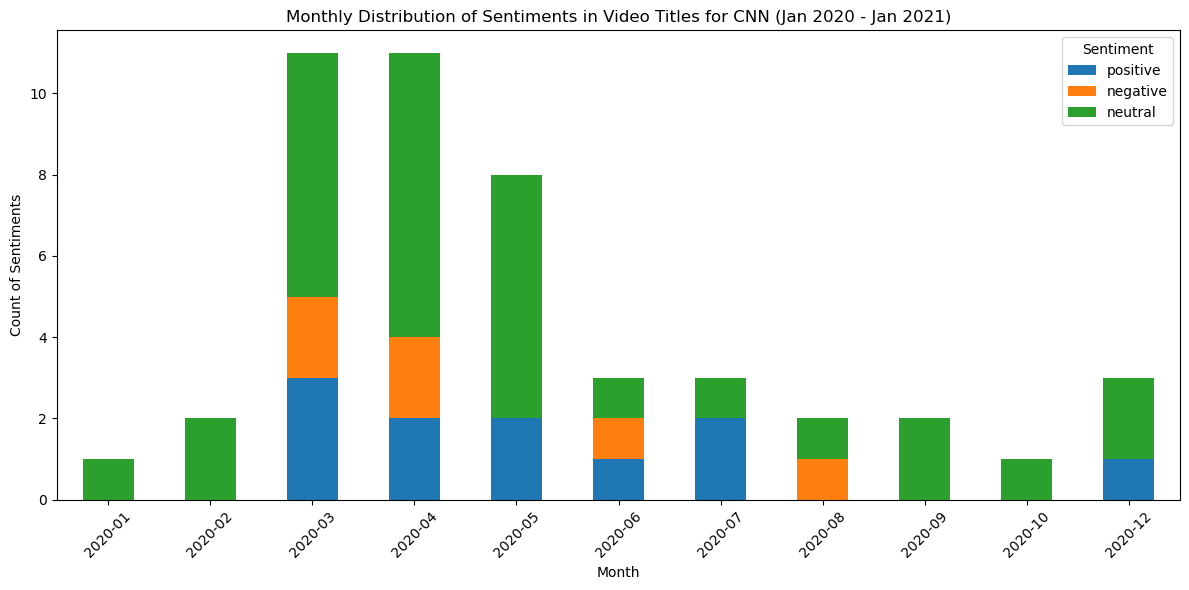

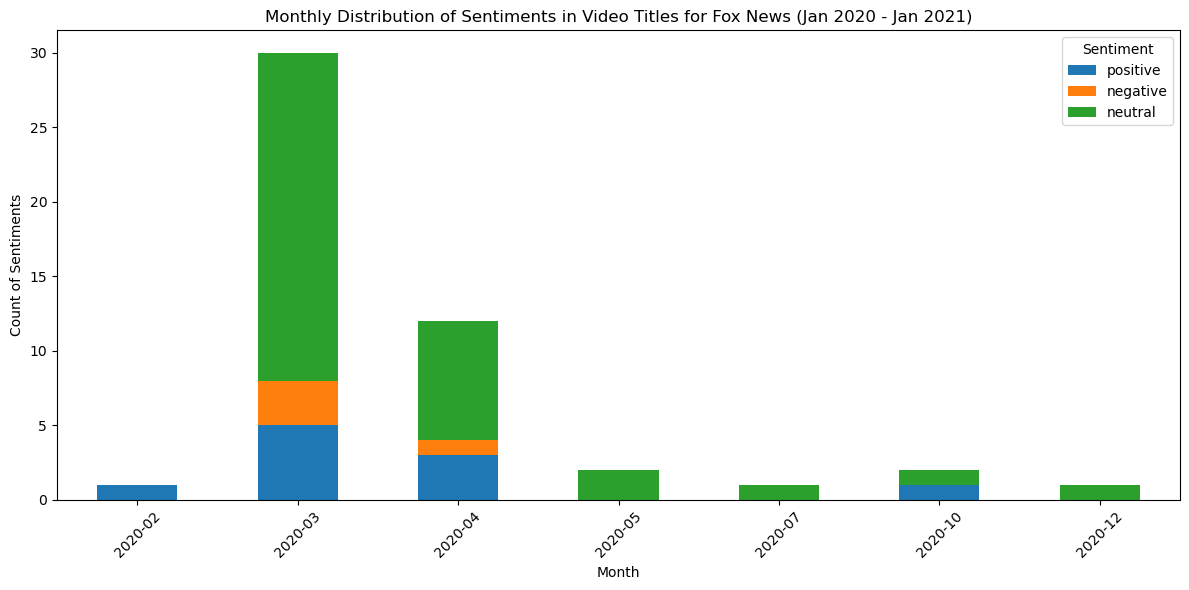

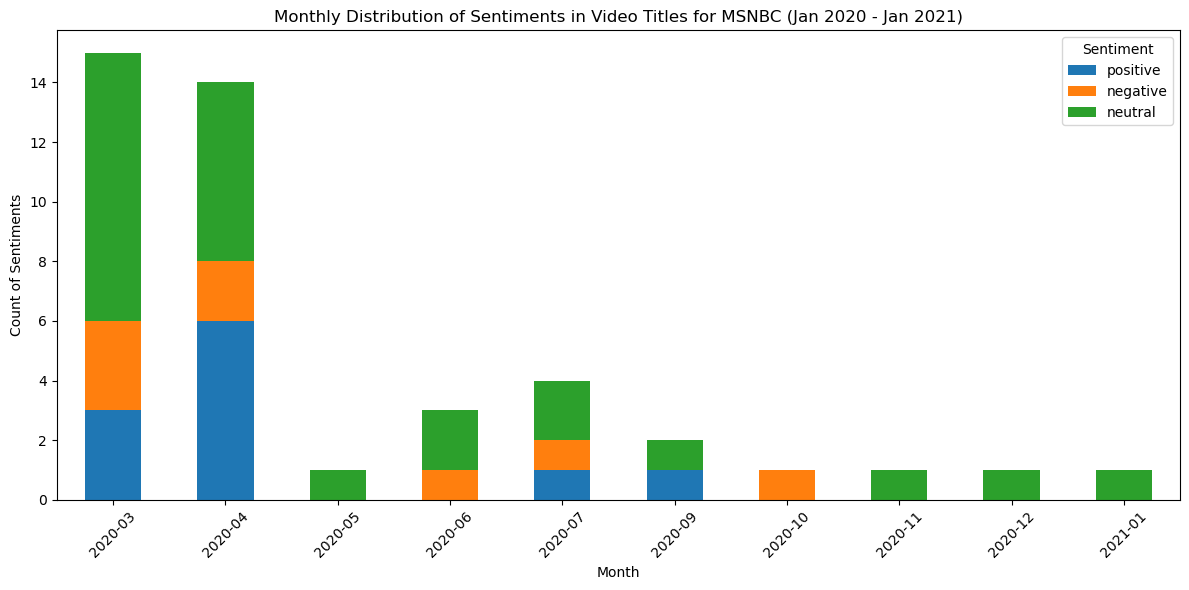

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Define sentiment analysis functions
def get_sentiment_score(text):
    """Get sentiment polarity score of the text"""
    try:
        analysis = TextBlob(str(text))  # Ensure text is converted to string
        return analysis.sentiment.polarity
    except:
        return None

def get_sentiment(score):
    """Categorize sentiment based on polarity score"""
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

def plot_sentiment_distribution(df, title, date_col):
    """Function to plot sentiment distribution"""
    sentiments = ['positive', 'negative', 'neutral']
    
    # Ensure all sentiments are present in the DataFrame
    for sentiment in sentiments:
        if sentiment not in df.columns:
            df[sentiment] = 0
    
    df = df.reset_index()
    df.set_index(date_col, inplace=True)
    df[sentiments].plot(kind='bar', stacked=True, figsize=(12, 6))
    
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('Count of Sentiments')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend(title='Sentiment')
    plt.show()

# Extract year and month from published_at and comment_date columns
comments_df['comment_date'] = pd.to_datetime(comments_df['comment_date'])
comments_df['comment_date_month'] = comments_df['comment_date'].dt.to_period('M')
videos_df['published_at'] = pd.to_datetime(videos_df['published_at'])
videos_df['published_at_month'] = videos_df['published_at'].dt.to_period('M')

# Apply sentiment analysis to video titles and comments
videos_df['video_title_sentiment'] = videos_df['video_title'].apply(get_sentiment_score).apply(get_sentiment)
comments_df['comment_text_sentiment'] = comments_df['comment_text'].apply(get_sentiment_score).apply(get_sentiment)

# Define start and end date for data analysis
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2021-01-31')

# Filter Data
videos_df_filtered = videos_df[(videos_df['published_at'] >= start_date) & (videos_df['published_at'] <= end_date)]
comments_df_filtered = comments_df[(comments_df['comment_date'] >= start_date) & (comments_df['comment_date'] <= end_date)]

# Group by month, sentiment, and channel for videos
video_sentiment_monthly = videos_df_filtered.groupby(['channel_title', 'published_at_month', 'video_title_sentiment']).size().unstack(fill_value=0)

# Merge videos and comments data frames
merged_df = pd.merge(comments_df_filtered, videos_df[['video_id', 'channel_title']], on='video_id', how='left')

# Group by month, sentiment, and channel for comments
comment_sentiment_monthly = merged_df.groupby(['channel_title', 'comment_date_month', 'comment_text_sentiment']).size().unstack(fill_value=0)

# Visualization for each news channel
for channel in comment_sentiment_monthly.index.levels[0]:
    plot_sentiment_distribution(comment_sentiment_monthly.loc[channel], 
                                f'Monthly Distribution of Sentiments in Comments for {channel} (Jan 2020 - Jan 2021)', 
                                'comment_date_month')

# Visualization for video sentiments
for channel, df in video_sentiment_monthly.groupby(level=0):
    plot_sentiment_distribution(df, 
                                f'Monthly Distribution of Sentiments in Video Titles for {channel} (Jan 2020 - Jan 2021)',
                                'published_at_month')


## News Source Comment and Video Title Sentiment Analysis

### Fox News
- **March 2020:** Witnessed the highest comment activity, with a mix of positive, neutral, and negative sentiments.
- **Post-March 2020:** Experienced a sharp decline in comment volume.
- **Sentiment Distribution:** Skewed towards positive comments, followed by neutral and negative ones.

### BBC News
- **June 2020:** Peak month for comment activity.
- **Year-long Distribution:** Comments are more evenly spread throughout the year, with a noticeable decline after July 2020.
- **Sentiment Distribution:** Neutral comments prevail, followed by positive and negative sentiments.

### MSNBC
- **March and April 2020:** Recorded highest comment activity, followed by a significant drop afterward.
- **Sentiment Distribution:** Dominated by neutral comments, with positive and negative sentiments following.

### CNN
- **April 2020:** Peak in comment activity, maintaining relatively steady engagement throughout the year.
- **Sentiment Distribution:** Neutral comments are most common, followed by positive and negative sentiments.

### Video Titles Sentiment Analysis
- **Neutral Sentiments:** Most frequent in video titles, with notable peaks in March 2020, April 2020, and November 2020.
- **Positive and Negative Sentiments:** Less frequent compared to neutral sentiments.
- **Monthly Variation:** Varies monthly, with some months showing very few or no recorded sentiments.

### General Observations
- **Peak in Engagement:** All news sources experienced a peak in comment activity around March 2020.
- **Neutral Dominance:** Neutral sentiments are the most common across comments and video titles.
- **Sentiment Balance:** Positive and negative sentiments are relatively balanced, with negative sentiments less frequent.
- **Decline in Activity:** A general decline in comment activity across all sources after mid-2020.

